# Mohamad Wehbe
## Race Car Optimization Using Genetic Algorithm
### Optimization Strategy:
My strategy was to optimize for a single lap while taking into consideration the total number of laps in the race. The Genetic Algorithim takes on an elitist strategy to minimize the total time. The objective function is written in terms of the variable velocity.

### NOTES:
I have included useful outputs under each section of code to make your peer review experience simple :) 
If anything is unclear you can contact me @ +34 666 829 899

### Instructions:

- Make sure that the excel files are in xlsx format and not csv. If they are in csv format, use the following website to convert: https://convertio.co/csv-xlsx/

- Make sure the files are called:
    - Case3_track
    - Case3_vehicle
    - Case3_fuel
    

- I have included a screenshot of the results.

- I would suggest running the Jupyter file instead of the python file because its prettier.

- When you first run it, it will load until the genetic algorithm calculates the result, the loading bar is under the 2nd block of code. (shouldnt take more than 2 mins)

- Inputs can be seen under code block 1 (in jupyter)

- once the GA calculates the results, you can check the dashboard under code block 3.Nevertheless, the results under code block 2 (generated by GA and are immutable) mean the following:
    - best solution found: the velocity per segment in each lap (note that the velocities for every lap are identical)
    - objective function: total time to complete race in seconds


# Code block 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tabulate as tab
import cmath as math
import pandas as pd
from geneticalgorithm import geneticalgorithm as ga

# Extract data from input file (data parsing)

    ## read the input data

vehicle_data_df=pd.read_excel('Case3_vehicle.xlsx',usecols=[1])
track_data_df=pd.read_excel('Case3_track.xlsx')
fuel_data_df=pd.read_excel('Case3_fuel.xlsx',usecols=[1])
 
    ## dataframe to array

vehicle_data=vehicle_data_df.to_numpy()
fuel_data=fuel_data_df.to_numpy()

    ## create parameters
        ### Vehicle

vehicle_weight=vehicle_data[0] #kg
drag_coefficient=vehicle_data[1]
rolling_friction=vehicle_data[2]
frontal_area=vehicle_data[3] #m^2

powertrain_power=vehicle_data[4] #kW
powertrain_efficiency=0.95

battery_capacity=vehicle_data[5] #kWh
battery_power=vehicle_data[6] #kW
battery_weight=vehicle_data[7] #kg
battery_soc=1

regenerative_breaking_power=vehicle_data[8] #kW
regenerative_breaking_efficiency=vehicle_data[9]

cooling_system_power=vehicle_data[10]/1000 #kW
lights_power=vehicle_data[11]/1000 #kW
control_system_power=vehicle_data[12]/1000 #kW

available_area_pv=vehicle_data[13] #m2
pv_efficiency=vehicle_data[14] #kw/m2
pv_power=available_area_pv*pv_efficiency*600/1000 #kW ### note: professor added the value for pv irradiance LATE! and by then my model was already built. I added it as 600/1000 (or 0.6 kw/m2 or 600 w/m2)
pv_weight=3*available_area_pv #assumed 3 kgs per meter squared

total_weight=pv_weight+vehicle_weight+battery_weight #kg 
        ### environment

air_density=1.225 #kg/m^3
gravity=9.81 #m/s^2

        ### track
            #### note: check the titles of the excel file columns to make sure the excel file will work
number_of_laps=20 ## can be optimized for any number of laps!!!
track_max_speed_kmph=track_data_df['Max Speed (km/h)'].values #km/h
track_max_speed=track_max_speed_kmph*(1000/3600) #m/s
track_length_km=track_data_df['Length (km)'].values #km
track_length=track_length_km*1000 #m
track_slope_deg=track_data_df['Slope (º)'].values #º
track_slope=track_slope_deg*(math.pi/180) #radians

        ### fuel

Fuel_Efficiency=fuel_data[0]
co2_emissions=fuel_data[1] #kgCO2/kWh
average_irradiance=fuel_data[2] #w/m2

        ### check inputs
           
            #### arrange data
        
vehicle_data_table_values=np.concatenate((vehicle_weight,drag_coefficient,rolling_friction,frontal_area,powertrain_power,[powertrain_efficiency],\
    battery_capacity,battery_power,battery_weight,[battery_soc],regenerative_breaking_power,regenerative_breaking_efficiency,\
    cooling_system_power,lights_power,control_system_power,available_area_pv,pv_efficiency,pv_power,pv_weight,[air_density],[gravity],total_weight))

vehicle_data_table_titles=np.concatenate((['vehicle weight'],['drag coefficient'],['rolling friction'],['frontal area'],['powertrain power'],['powertrain efficiency'],\
    ['battery capacity'],['battery power'],['battery weight'],['battery soc'],['regenerative breaking power'],['regenerative breaking efficiency'],\
    ['cooling system power'],['lights power'],['control system power'],['available area pv'],['pv efficiency'],['pv power'],['pv_weight'],['air density'],['gravity'],['total weight']))
vehicle_table=np.stack((vehicle_data_table_titles,vehicle_data_table_values), axis=1)

track_data_titles=np.concatenate((['speed limit (m/s)','length (m)','slope(degrees)'],np.concatenate(np.stack((track_max_speed,track_length,track_slope),axis=1))))
track_table=np.reshape(track_data_titles,(-1,3))
       
        #### print tables

print('vehicle data')
print(tab.tabulate(vehicle_table))
print('track data')
print(tab.tabulate(track_table))
print('number of laps:',number_of_laps)

vehicle data
--------------------------------  -------
vehicle weight                    250
drag coefficient                    1.59
rolling friction                    0.01
frontal area                        1.5
powertrain power                  140
powertrain efficiency               0.95
battery capacity                    7.5
battery power                     140
battery weight                     50
battery soc                         1
regenerative breaking power       120
regenerative breaking efficiency    0.15
cooling system power                0.06
lights power                        0.05
control system power                0.5
available area pv                   1.5
pv efficiency                       0.22
pv power                            0.198
pv_weight                           4.5
air density                         1.225
gravity                             9.81
total weight                      304.5
--------------------------------  -------
track data
------------

# Code block 2

 The best solution found:                                                                           
 [32.37705691 26.84735451 22.19623555 26.32998428 30.53397022 24.2057762
 19.40298655 17.73461994 16.59066951 23.2302146  30.0666209  20.22324759
 11.09732802 21.9312697  32.83547058 23.8568116  16.65242955 20.81333843
 24.93653562 27.03369597 30.41635794 24.6655084  18.46554603 25.8402541
 33.2521851  30.08634859 24.95363785 22.09165307 19.15869353 24.9036782
 30.39541345 23.51142286 18.7562004  22.01729456 24.92137105 27.47526745
 30.46141181 31.73784184 33.20813411 23.54248166 13.810645   22.97706796]

 Objective function:
 712.91327467459


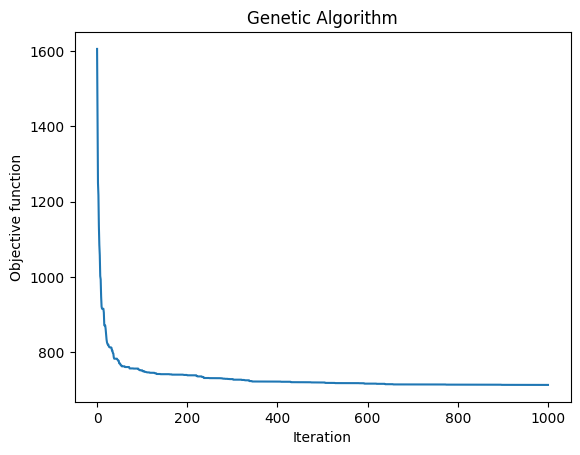

In [2]:
track_acceleration=np.array(np.zeros(42))

time_lap_minimum=0

# Define objective function

def totaltime(track_speed):

        ### Globalize relevant variables

    global track_time, track_acceleration, power, energy, battery_final_capacity, total_energy

    track_time=(track_length/track_speed)

        ### Define acceleration
    i=0
    for i in range(0,len(track_time)):
       
        if i == 0:
            track_acceleration[i]=(track_speed[i+1]**2+0)/(2*track_length[i]) #m/s^2
        elif (i % 2) == 0:
            track_acceleration[i]=(track_speed[i+1]**2-track_speed[i-1]**2)/(2*track_length[i])
        else:
            track_acceleration[i]=0

        ### create acceleration sign array
    
    i=0
    acceleration_sign = np.zeros(42)
    for i in range(0,len(track_time)):
        if track_acceleration[i] != 0:
            acceleration_sign[i] = np.sign(track_acceleration[i])
        if track_acceleration[i] == 0:
            acceleration_sign[i] = 1    
        
        ### Calculate energy
          
            #### forces

    aerodynamic_force=0.5*air_density*frontal_area*drag_coefficient*track_speed*track_speed*acceleration_sign #newtons
    slope_losses=(total_weight)*gravity*np.sin(track_slope) #newtons
    acceleration_force=(total_weight)*(track_acceleration) #newtons
    friction_losses=(total_weight)*gravity*rolling_friction*np.cos(track_slope)*acceleration_sign #newtons
    total_force=acceleration_force+aerodynamic_force+friction_losses+slope_losses #newtons
    for i in range(0,len(total_force)): # since regenerative breaking has an efficiency of 15%
        if total_force[i] < 0:
            total_force[i]=total_force[i]*regenerative_breaking_efficiency

            #### power and energy
    

    power=-(total_force*track_speed)/1000 - control_system_power - lights_power - cooling_system_power + pv_power #kw (watt to kw /1000)
    energy=((power*(track_time/3600))/powertrain_efficiency) #kwh

        ### calculate total energy expended per lap

    total_energy=sum(energy)

        ### calculate final capacity after 20 laps
    
    battery_final_capacity = battery_capacity + total_energy*number_of_laps # battery final capacity after 20 laps

        #Calculate total time per lap

    total_time=sum(track_time)
    
         ## fitness algorithim (penalties)
            ### max power penalty
    if (power[i]) > min(powertrain_power,battery_power):
            total_time = total_time + 9999
    #         #### run out of battery capacity penalty (for 20 laps)
    if battery_final_capacity < 0:
            total_time = total_time + 9999

    total_time=total_time*number_of_laps ##time for 20 laps!!
    
    return total_time

        ### Calculate speed 


#Adjust GA parameters

algorithm_param = {'max_num_iteration': 1000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.01,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv': None}

# set max speed boundary

varbound=np.stack((np.zeros(len(track_max_speed)),track_max_speed),axis=1)

# run genetic algorithm

model=ga(function=totaltime,dimension=len(track_length),variable_type='real',variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Parse Results

model_values=model.output_dict.values()
model_values_list=list(model_values)

track_speed=model_values_list[0]
total_time=model_values_list[1]

# Code block 3



total time: 712.91 s
            00:11:52






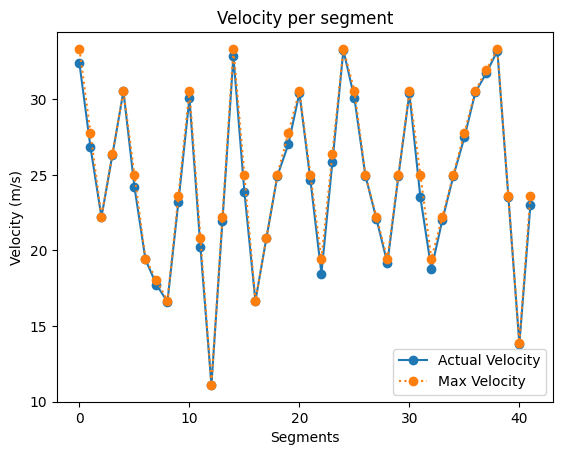

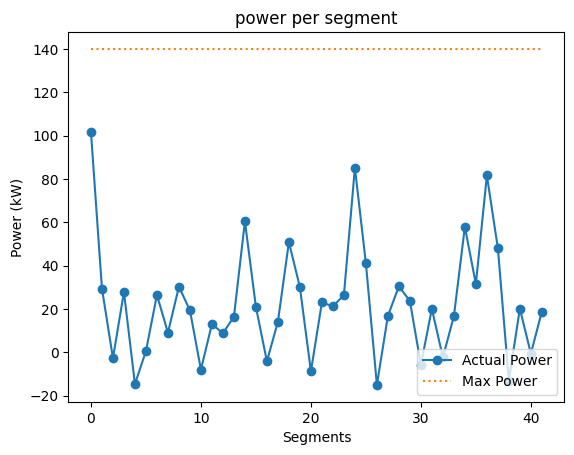

note: In the graph above, positive power denotes power wasted and negetive power denotes power generated.




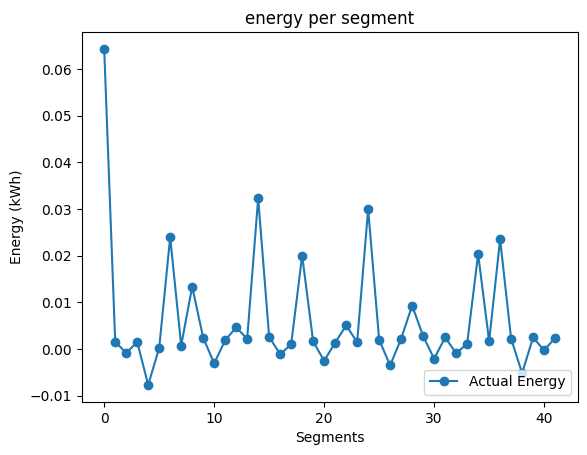

note: In the graph above, positive energy denotes power wasted and negetive power denotes energy generated.




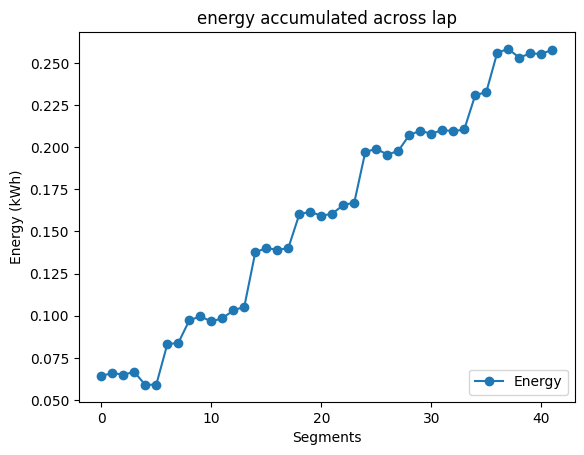

total energy spent per lap: 0.2577954479872468 kWh




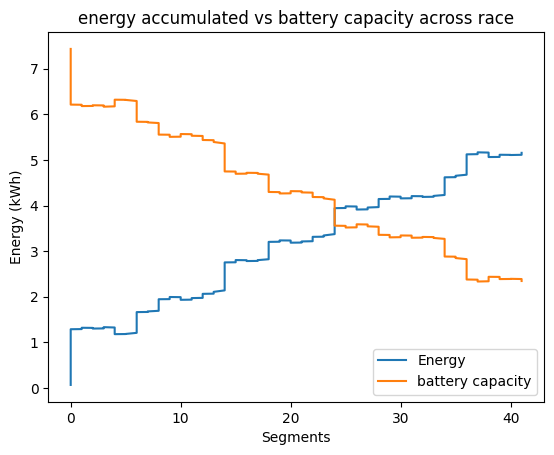

total energy spent across race: 5.155908959744948 kWh




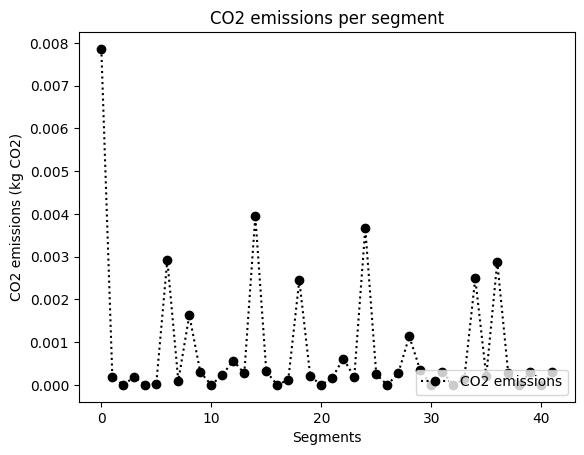

total CO2 emissions: 0.034822881688880925 kg CO2




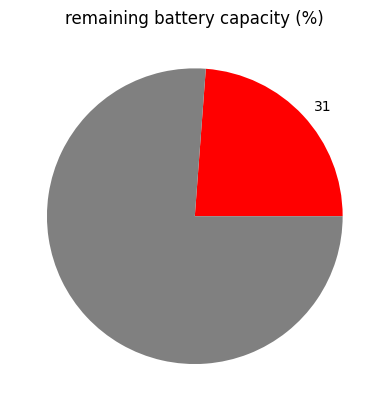

final battery capacity [2.34409104] kWh


In [3]:
# dashboard
print('\n')
print('total time:',round(total_time,2),'s')

from time import strftime
from time import gmtime
hours_mins_seconds=strftime("%H:%M:%S", gmtime(total_time))
print('           ',hours_mins_seconds)
print('\n')
print('\n')

segments=list(range(0,len(track_length)))
plt.plot(segments,track_speed,marker='o')
plt.plot(segments,track_max_speed,marker='o', linestyle='dotted')
plt.title("Velocity per segment")
plt.xlabel("Segments")
plt.ylabel("Velocity (m/s)")
plt.legend(["Actual Velocity", "Max Velocity"], loc ="lower right")
plt.show()
print('\n')

max_power=np.repeat(min(powertrain_power,battery_power),len(track_length))
plt.plot(segments,-power,marker='o')
plt.plot(segments,max_power,  linestyle='dotted')
plt.title("power per segment")
plt.xlabel("Segments")
plt.ylabel("Power (kW)")
plt.legend(["Actual Power", "Max Power"], loc ="lower right")
plt.show()
print('note: In the graph above, positive power denotes power wasted and negetive power denotes power generated.')
print('\n')

plt.plot(segments,-energy,marker='o')
plt.title("energy per segment")
plt.xlabel("Segments")
plt.ylabel("Energy (kWh)")
plt.legend(["Actual Energy"], loc ="lower right")
plt.show()
print('note: In the graph above, positive energy denotes power wasted and negetive power denotes energy generated.')
print('\n')

energy_accumulated_lap=np.zeros(42)
energy_accumulated_lap[0]=energy[0]
for i in range(0, len(energy)-1):
    energy_accumulated_lap[i+1]=energy_accumulated_lap[i]+energy[i+1]

plt.plot(segments,-energy_accumulated_lap,marker='o')
plt.title("energy accumulated across lap")
plt.xlabel("Segments")
plt.ylabel("Energy (kWh)")
plt.legend(["Energy"], loc ="lower right")
plt.show()
print('total energy spent per lap:',sum(-energy),'kWh')
print('\n')

energy_accumulated_race=np.zeros(840)
energy_accumulated_race[0]=energy[0]
energy_repeat=np.repeat(energy, 20)
for i in range(0, len(energy_repeat)-1):
    energy_accumulated_race[i+1]=energy_accumulated_race[i]+energy_repeat[i+1]
segments_race=np.repeat(segments,20)

battery_capacity_race=np.repeat(battery_capacity,840)
for i in range (0, len(battery_capacity_race)):
    battery_capacity_race[i]=battery_capacity_race[i]+energy_accumulated_race[i]




plt.plot(segments_race,-energy_accumulated_race)
plt.plot(segments_race,battery_capacity_race)
plt.title("energy accumulated vs battery capacity across race")
plt.xlabel("Segments")
plt.ylabel("Energy (kWh)")
plt.legend(["Energy",'battery capacity'], loc ="lower right")
plt.show()
print('total energy spent across race:',sum(-energy_repeat),'kWh')
print('\n')

#CO2 emissions:
co2=np.zeros(42)
for i in range(0 , len(energy)):
    if energy[i] < 0:
        co2[i]=co2_emissions*-energy[i]


plt.plot(segments,co2, 'o:k')
plt.title("CO2 emissions per segment")
plt.xlabel("Segments")
plt.ylabel("CO2 emissions (kg CO2)")
plt.legend(['CO2 emissions'], loc ='lower right')
plt.show()
print('total CO2 emissions:',sum(co2),'kg CO2')
print('\n')


pie = [float(battery_final_capacity),float(battery_capacity)]
ratio=round(float(battery_final_capacity/battery_capacity)*100)
plt.pie(pie,labels=[ratio,''],colors=['red','grey'])
plt.title('remaining battery capacity (%)')
plt.show() 
print('final battery capacity',battery_final_capacity,'kWh')